<a href="https://colab.research.google.com/github/karolinablaszka/Project-ML/blob/EDA/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans
#from time import time
#from sklearn import metrics
#import plotly.express as px
from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV
from scipy import stats
import joblib
import seaborn as sb

In [70]:
df = pd.read_csv(r'src\data\data_ML\train_data.csv', header=None)

In [71]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,304.361,-436.590,-33854.769,-96571.569,-15086.947,-794.409,-442.859,304.248,-202.411,-506.852,...,95.294,-3.936,-251.812,256.429,-473.661,-1398.604,42.638,771.185,-191.123,1356.137
1,54.047,90.087,-154.747,-4116.486,38365.133,-589.309,1115.367,274.199,814.953,167.272,...,-176.341,-426.238,-542.428,99.147,-102.309,-277.948,-98.859,-1163.779,265.231,-992.056
2,272.168,-201.736,4212.592,-9123.655,-35422.458,-1029.249,-506.290,-476.856,-570.731,-161.288,...,321.426,-376.033,142.834,920.958,-122.525,-174.304,-137.612,-1571.473,678.323,1020.263
3,170.007,68.736,48662.079,29735.235,-13903.955,895.081,-257.748,-811.058,-691.561,-31.439,...,-409.919,400.946,313.270,123.172,1786.962,147.637,31.433,-784.719,573.433,1454.415
4,86.797,180.052,-49643.545,2515.406,26206.315,-407.453,-189.416,-53.664,-159.507,-42.291,...,-101.761,-424.898,37.254,-337.431,423.691,14.240,267.352,-234.560,-213.804,873.391


In [72]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,...,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,30.644135,9.080955,169.679419,811.083532,-186.008805,25.717789,24.918118,19.061259,14.826002,14.970447,...,13.997377,21.456582,22.586461,16.736889,13.992185,-1.426345,9.597250,-2.031243,-2.841237,38.071903
std,286.172414,213.166659,43665.003613,57123.457110,21942.466227,711.556331,898.109174,868.676044,532.727247,236.749501,...,269.223339,545.746530,265.221187,503.416444,818.825405,655.666258,204.731554,793.022407,629.128655,768.405732
min,-989.450000,-859.922000,-163336.428000,-243844.632000,-77566.109000,-2414.196000,-3227.681000,-3151.321000,-1792.781000,-794.271000,...,-957.937000,-1983.009000,-937.357000,-1758.858000,-2526.791000,-2165.769000,-739.205000,-2731.037000,-2223.909000,-2565.513000
25%,-163.781750,-135.343500,-29284.119500,-38028.429000,-14426.799500,-448.696750,-590.170250,-562.956500,-349.689750,-144.157750,...,-169.777250,-352.959500,-154.639750,-328.083750,-550.599000,-432.000750,-129.076250,-561.304000,-424.192750,-462.828000
50%,35.478500,2.680500,1181.698500,980.588000,-154.835000,13.931500,13.674000,16.750500,9.731000,11.159500,...,18.700000,38.348500,26.199500,14.575500,1.363500,-3.796500,8.600500,-4.243000,-7.628000,28.107000
75%,215.780500,156.095750,29630.914500,40561.960250,14515.833000,506.893250,630.490750,608.698000,383.110500,179.768250,...,196.049000,396.868500,198.237250,356.185500,574.453250,425.338000,149.855750,539.550000,427.794500,552.173500
max,1224.394000,722.868000,177744.241000,215372.854000,86287.955000,2446.466000,3118.087000,2966.971000,1914.308000,803.200000,...,893.196000,2080.750000,1070.453000,1705.664000,2868.989000,2562.331000,685.176000,3123.617000,2204.527000,2664.074000


c:\Users\karol\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

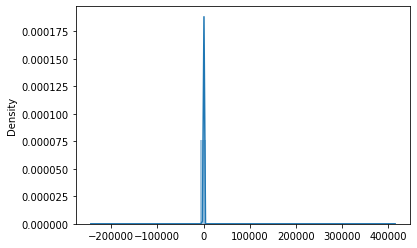

In [73]:
sb.distplot(df)

In [74]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [75]:
df.shape

(3750, 10000)

In [76]:
def missing():
    missing = [(c, df[c].isna().mean()*100) for c in df]
    missing = pd.DataFrame(missing, columns=["feature", "percentage"])
    missing = missing[missing.percentage > 0]
    print(missing.sort_values("percentage", ascending=False))
missing()

Empty DataFrame
Columns: [feature, percentage]
Index: []


In [77]:
from scipy.stats import zscore as zscore_outlier
df2 = df.T
# def outliers_2(df):
#     Q1, Q3 = np.percentile(df, [20, 80])
#     IQR = Q3 - Q1
#     return (df < (Q1 - 1.5 * IQR))&(df > (Q3 + 1.5 * IQR))

df3 = df2[(np.abs(stats.zscore(df2)) < 3).all(axis=1)]
df = df3.T
df

    

,0,1,5,8,9,10,11,13,15,18,...,9986,9988,9989,9990,9991,9992,9993,9995,9996,9998
0,304.361,-436.590,-794.409,-202.411,-506.852,-1856.524,338.402,-1087.578,-239.056,-63.420,...,347.036,-134.713,4.321,95.294,-3.936,-251.812,256.429,-1398.604,42.638,-191.123
1,54.047,90.087,-589.309,814.953,167.272,82.940,786.969,-325.793,57.437,370.416,...,267.289,-42.546,38.877,-176.341,-426.238,-542.428,99.147,-277.948,-98.859,265.231
2,272.168,-201.736,-1029.249,-570.731,-161.288,-1.593,-808.933,179.237,-157.871,612.111,...,-246.501,-185.183,151.583,321.426,-376.033,142.834,920.958,-174.304,-137.612,678.323
3,170.007,68.736,895.081,-691.561,-31.439,-614.788,72.163,82.145,50.892,-35.659,...,-637.637,612.218,-317.117,-409.919,400.946,313.270,123.172,147.637,31.433,573.433
4,86.797,180.052,-407.453,-159.507,-42.291,735.881,-370.112,-602.448,-156.653,677.102,...,1269.719,-1305.499,-250.212,-101.761,-424.898,37.254,-337.431,14.240,267.352,-213.804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,338.539,-98.216,553.155,1016.730,49.772,441.059,49.013,685.306,-0.509,37.557,...,1058.443,-322.300,-107.473,350.501,-607.873,430.407,-469.737,328.636,105.448,378.017
3746,105.511,-167.468,711.218,-171.175,-325.444,156.940,70.672,599.535,-321.365,117.407,...,292.849,710.583,-161.044,4.759,-9.079,104.333,4.676,-92.252,86.110,433.674
3747,93.186,-155.288,-80.498,-848.946,-252.714,-1122.177,141.239,58.970,-130.815,-59.052,...,504.398,-738.939,32.973,-342.855,-151.956,7.386,564.910,-570.735,-5.810,-289.170
3748,857.066,98.182,-340.496,140.943,-281.100,-426.080,-197.777,-80.956,141.923,14.680,...,359.942,-122.821,137.109,200.827,-1445.572,-39.879,421.075,-538.616,141.365,310.130


In [78]:
#reducing memory usage
for col in df.columns:
    if df[col].dtype == 'float64': df[col] = df[col].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 0 to 3749
Columns: 7274 entries, 0 to 9998
dtypes: float32(7274)
memory usage: 104.1 MB


c:\Users\karol\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

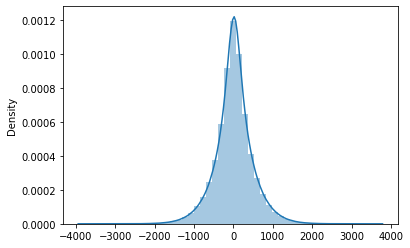

In [79]:
sb.distplot(df)

In [80]:
# from typing import Dict, Callable
# def outliers(df_copy: pd.DataFrame, outliers_methods_dict: Dict[str, Callable]):
#     for method_name, method in outliers_methods_dict.items():
#         df = df_copy.copy()

#         print('\nOutliers:\n', df.apply(lambda x: method(x)).sum(), '\n')

#         df = df[df.apply(lambda x: ~method(x))].dropna()
#         print(df.shape)

# def outliers_results():
#     outliers_methods_dict = {
#         "outliers_2": outliers_2
#         }
#     outliers(df, outliers_methods_dict)
# #if __name__ == '__main__':
# outliers_results()


In [81]:
df.shape

(3750, 7274)

In [82]:
corr_matrix = df.corr().abs()
print("corr matrix", corr_matrix)

corr matrix           0         1         5         8         9         10        11    \
0     1.000000  0.009717  0.007333  0.018783  0.003965  0.009179  0.008122   
1     0.009717  1.000000  0.001651  0.001311  0.012276  0.001682  0.019395   
5     0.007333  0.001651  1.000000  0.008294  0.005456  0.023650  0.013226   
8     0.018783  0.001311  0.008294  1.000000  0.002751  0.008972  0.026904   
9     0.003965  0.012276  0.005456  0.002751  1.000000  0.013858  0.010301   
...        ...       ...       ...       ...       ...       ...       ...   
9992  0.002033  0.007821  0.012463  0.008839  0.003606  0.001502  0.013518   
9993  0.002774  0.021165  0.010179  0.012103  0.014634  0.011856  0.005314   
9995  0.005980  0.017223  0.022484  0.010103  0.012017  0.042972  0.005108   
9996  0.004817  0.004058  0.020380  0.002743  0.027519  0.005496  0.028285   
9998  0.004539  0.012621  0.008822  0.013158  0.001864  0.013402  0.014433   

          13        15        18    ...      9986  

In [83]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(corr_matrix, k=1).astype(np.bool))
print("upper triangle", upper)

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

# Drop features
df.drop(df.columns[to_drop], axis=1)
df.shape

<ipython-input-83-27e8c826839c>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(corr_matrix, k=1).astype(np.bool))


upper triangle       0         1         5         8         9         10        11    \
0      NaN  0.009717  0.007333  0.018783  0.003965  0.009179  0.008122   
1      NaN       NaN  0.001651  0.001311  0.012276  0.001682  0.019395   
5      NaN       NaN       NaN  0.008294  0.005456  0.023650  0.013226   
8      NaN       NaN       NaN       NaN  0.002751  0.008972  0.026904   
9      NaN       NaN       NaN       NaN       NaN  0.013858  0.010301   
...    ...       ...       ...       ...       ...       ...       ...   
9992   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9993   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9995   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9996   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9998   NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          13        15        18    ...      9986      9988      9989  \
0     0.022369  0.00831

(3750, 7274)

In [91]:
#PCA + scatterplot
import seaborn as sns
pca = PCA(n_components=2)
# fit on all numerical features and reduce dimensionality to two dimensions
cols = df.columns
#pipe = make_pipeline(StandardScaler())
#df_std = pipe.fit_transform(df)
data_pca = pca.fit_transform(df)


# get percentage of retained variance after dimensionality reduction
ex_variance = pca.explained_variance_ratio_.sum()*100
print(f"The reduced 2-dimensional data still contains {ex_variance:.1f}% of the variance of the original data.")



The reduced 2-dimensional data still contains 0.2% of the variance of the original data.


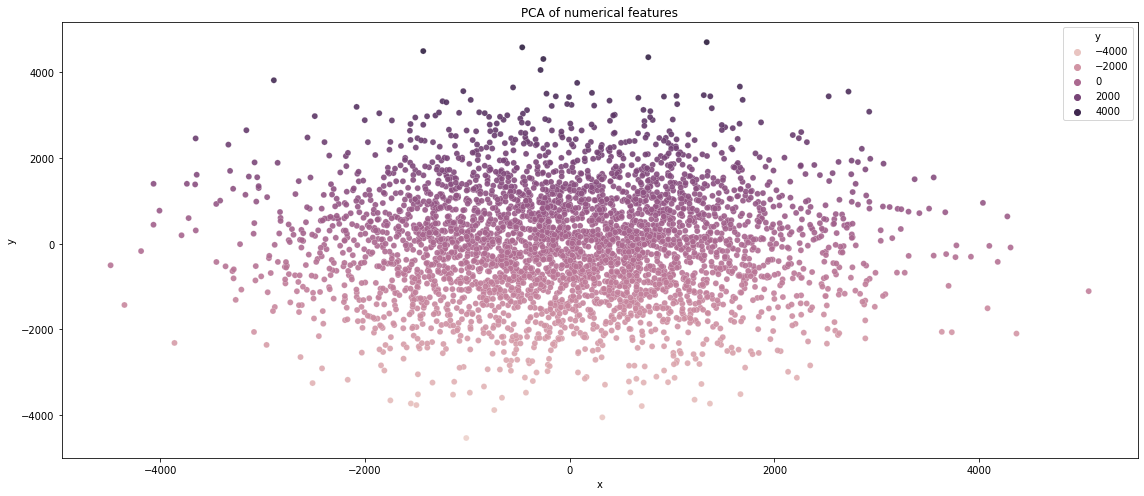

In [92]:
data_pca = pd.DataFrame(data_pca, columns=["x", "y"])
y="y"
data_pca = data_pca.join(df)
plt.figure(figsize=(16,7))
sns.scatterplot(x="x", y="y", data=data_pca, hue="y", linewidth=0.2, alpha=0.9)
plt.title(f"PCA of numerical features")
plt.tight_layout()
plt.show()

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, init='random')
pca = PCA(n_components=0.99)
pipeline = Pipeline([('pca', pca), ('tsne', tsne)])
pca_tsne_results = pipeline.fit_transform(df)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3750 samples in 1.737s...
[t-SNE] Computed neighbors for 3750 samples in 92.671s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3750
[t-SNE] Computed conditional probabilities for sample 2000 / 3750
[t-SNE] Computed conditional probabilities for sample 3000 / 3750
[t-SNE] Computed conditional probabilities for sample 3750 / 3750
[t-SNE] Mean sigma: 5425.731103
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.933784
[t-SNE] KL divergence after 300 iterations: 3.265788


<AxesSubplot:xlabel='pca_tsne-2d-one', ylabel='pca_tsne-2d-two'>

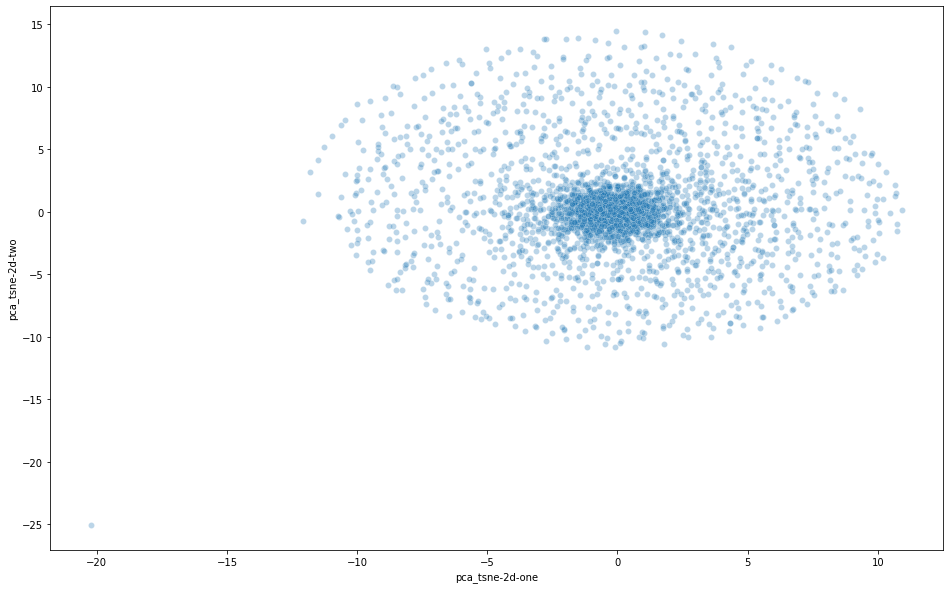

In [94]:
df['pca_tsne-2d-one'] = pca_tsne_results[:,0]
df['pca_tsne-2d-two'] = pca_tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca_tsne-2d-one", y="pca_tsne-2d-two",
    #hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

In [95]:

joblib.dump(df, 'train_data_2.pkl')

['train_data_2.pkl']